In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
path = '/content/drive/MyDrive/Datasets/Bank Marketing Classification Task/bank_data.csv'

df = pd.read_csv(path, header=0, index_col= 0)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Kiểm tra các thông tin cơ bản

In [98]:
print("Dataset có tổng cộng {} hàng và {} cột".format(df.shape[0], df.shape[1]))

Dataset có tổng cộng 4521 hàng và 17 cột


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [100]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [101]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [102]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [103]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<ipython-input-104-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

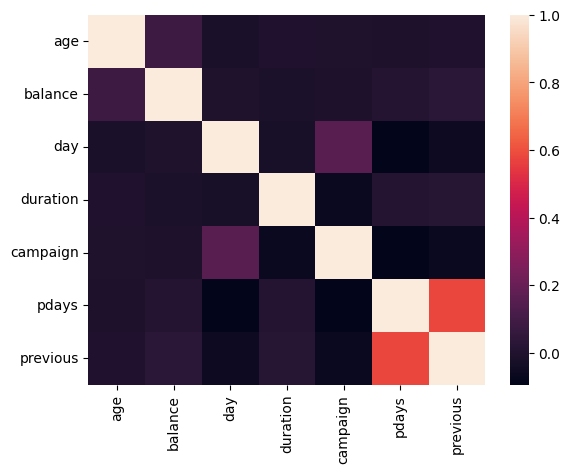

In [104]:
sns.heatmap(df.corr())

# Preprocesing

## Các cột cần xử lý bao gồm : job, martial, education, default, housing, loan, education,  poutcome, y

In [105]:
df.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 388.5+ KB


### feature job

In [106]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(df[['job']])

columns = encoder.get_feature_names_out(['job'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=columns)


print("Original DataFrame:")
print(df)
print("\nOne-hot Encoded DataFrame:")
print(one_hot_df)

Original DataFrame:
      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campai

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
one_hot_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [109]:
df['job'] = df['job'].replace('admin.' , 'admin')

In [110]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin            478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [111]:
df = pd.concat([df, one_hot_df],axis=1)

In [112]:
df.drop(columns = 'job' , inplace =True)

In [113]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,married,primary,no,1787,no,no,cellular,19,oct,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33,married,secondary,no,4789,yes,yes,cellular,11,may,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,35,single,tertiary,no,1350,yes,no,cellular,16,apr,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,married,tertiary,no,1476,yes,yes,unknown,3,jun,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,married,secondary,no,0,yes,no,unknown,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### feature education

In [114]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [115]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['education']= lbe.fit_transform(df['education'])
df['education'] = df['education'].astype(float)

### feature default

In [116]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [117]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['default']= lbe.fit_transform(df['default'])
df['default'] = df['default'].astype(float)

### feature housing

In [118]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['housing']= lbe.fit_transform(df['housing'])
df['housing'] = df['housing'].astype(float)

### feature loan

In [119]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['loan']= lbe.fit_transform(df['loan'])
df['loan'] = df['education'].astype(float)

### feature contact

In [120]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['contact']= lbe.fit_transform(df['contact'])
df['contact'] = df['contact'].astype(float)

### feature poutcome

In [121]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['poutcome']= lbe.fit_transform(df['poutcome'])
df['poutcome'] = df['poutcome'].astype(float)

### feature marital

In [122]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['marital']= lbe.fit_transform(df['marital'])
df['marital'] = df['marital'].astype(float)

### feature y

In [123]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
df['y']= lbe.fit_transform(df['y'])
df['y'] = df['y'].astype(float)

### feature month

In [124]:
df['month'].head(25)

0     oct
1     may
2     apr
3     jun
4     may
5     feb
6     may
7     may
8     may
9     apr
10    may
11    apr
12    aug
13    apr
14    jan
15    aug
16    aug
17    apr
18    may
19    jul
20    nov
21    nov
22    jun
23    jul
24    jan
Name: month, dtype: object

In [125]:
month_to_num = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
               'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_to_num)

In [126]:
df['month'] = df['month'].astype(int)

### Di chuyển feature y về cột cuối cùng


In [127]:
df_outcome = df['y']
df.drop(columns='y', inplace=True)# đưa feature y về cột cuối cùng đễ dễ dàng nhận dạng
df['y'] = df_outcome

In [128]:
df.head(5)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,y
0,30,1.0,0.0,0.0,1787,0.0,0.0,0.0,19,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33,1.0,1.0,0.0,4789,1.0,1.0,0.0,11,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,35,2.0,2.0,0.0,1350,1.0,2.0,0.0,16,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1.0,2.0,0.0,1476,1.0,2.0,2.0,3,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,1.0,1.0,0.0,0,1.0,1.0,2.0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### kiểm tra lại dataset sau khi xử lí

<Axes: >

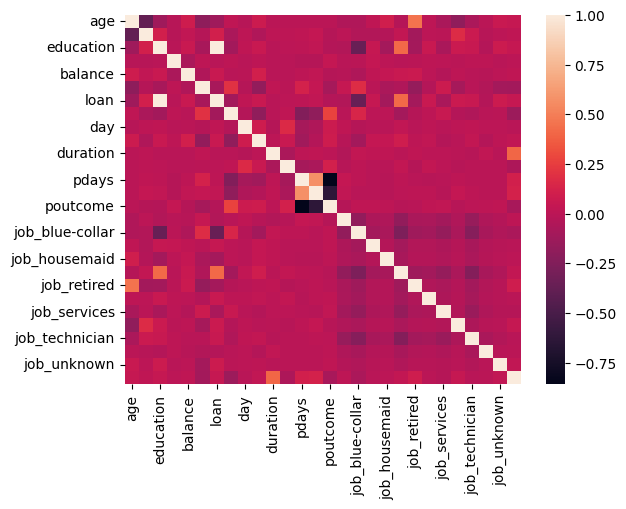

In [129]:
sns.heatmap(df.corr())

# Modeling and Evaluation


In [130]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.3 , random_state = 42)

## Logistic Regression


In [131]:
from sklearn.linear_model import LogisticRegression
# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression()
# Huấn luyện mô hình trên dữ liệu huấn luyện
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
y_pred = lr.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix
import tensorflow as tf
# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

loss = tf.keras.losses.BinaryCrossentropy()(y_test, y_pred)
print("Cross-Entropy Loss:", loss.numpy())

accuracy_score: 0.8901989683124539
F1-Score: 0.30697674418604654
Precision score: 0.5238095238095238
Cross-Entropy Loss: 1.6936752557827952


In [134]:
# Tạo DataFrame từ y_pred và y_test
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra một số dòng đầu của DataFrame
results_df.head(10)

,Actual,Predicted
2398,0.0,0.0
800,0.0,1.0
2288,0.0,0.0
2344,0.0,0.0
3615,0.0,0.0
3548,0.0,0.0
1115,0.0,0.0
4053,0.0,0.0
838,0.0,0.0
4141,0.0,0.0


<Axes: >

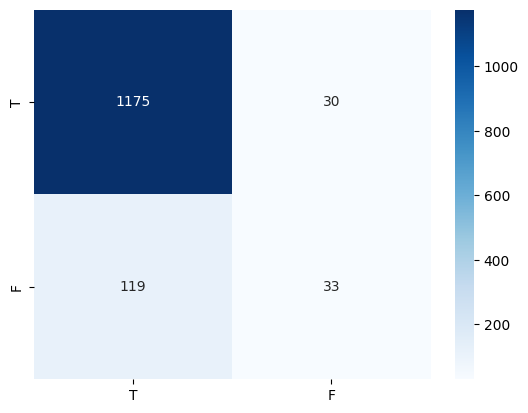

In [135]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])


### GridSearchCV

In [136]:

from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='f1' , refit = True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [137]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8916728076639646


In [138]:
cv_lr = LogisticRegression(C= 0.001, penalty= 'none', solver= 'newton-cg')
cv_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [139]:
y_pred = cv_lr.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix
import tensorflow as tf
# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

loss = tf.keras.losses.BinaryCrossentropy()(y_test, y_pred)
print("Cross-Entropy Loss:", loss.numpy())

accuracy_score: 0.8916728076639646
F1-Score: 0.30985915492957744
Precision score: 0.5409836065573771
Cross-Entropy Loss: 1.6709413597317095


In [141]:
# Tạo DataFrame từ y_pred và y_test
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra một số dòng đầu của DataFrame
results_df.head(10)

,Actual,Predicted
2398,0.0,0.0
800,0.0,0.0
2288,0.0,0.0
2344,0.0,0.0
3615,0.0,0.0
3548,0.0,0.0
1115,0.0,0.0
4053,0.0,0.0
838,0.0,0.0
4141,0.0,0.0


<Axes: >

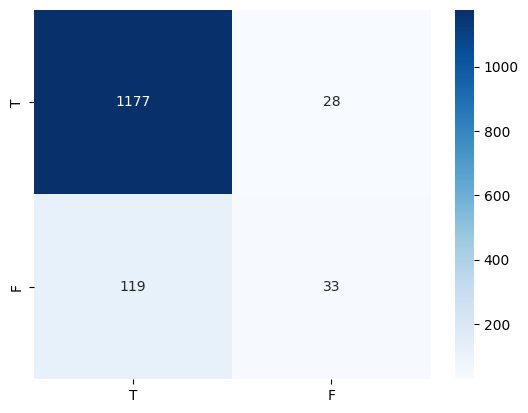

In [142]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])


## Decision Tree


In [143]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
y_pred = dt.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.8673544583640383
F1-Score: 0.4230769230769231
Precision score: 0.4125


In [146]:
# Tạo DataFrame từ y_pred và y_test
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra một số dòng đầu của DataFrame
results_df.head(5)

,Actual,Predicted
2398,0.0,0.0
800,0.0,0.0
2288,0.0,0.0
2344,0.0,0.0
3615,0.0,0.0


<Axes: >

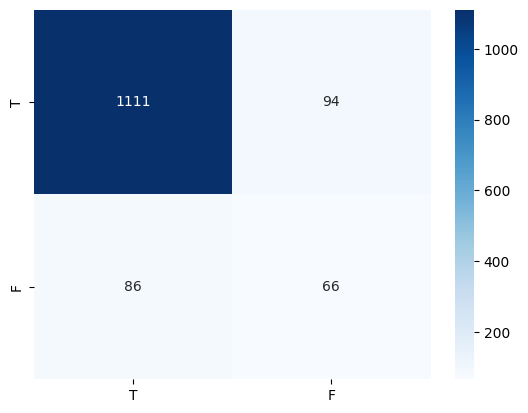

In [147]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])

### GridSearchCV

In [148]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy','log-loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1' , refit = True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

In [149]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.8865143699336773


In [150]:
cv_lr = DecisionTreeClassifier(criterion= 'entropy',max_depth= 10, min_samples_leaf= 2, min_samples_split= 2)
cv_lr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [151]:
y_pred = dt.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.8673544583640383
F1-Score: 0.4230769230769231
Precision score: 0.4125


## Random Forest


In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [154]:
y_pred = rfc.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.8975681650700074
F1-Score: 0.35944700460829493
Precision score: 0.6


In [156]:
# Tạo DataFrame từ y_pred và y_test
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra một số dòng đầu của DataFrame
results_df.head(10)

,Actual,Predicted
2398,0.0,0.0
800,0.0,1.0
2288,0.0,0.0
2344,0.0,0.0
3615,0.0,0.0
3548,0.0,0.0
1115,0.0,0.0
4053,0.0,0.0
838,0.0,0.0
4141,0.0,0.0


Text(0.5, 1.0, 'confusion matrix')

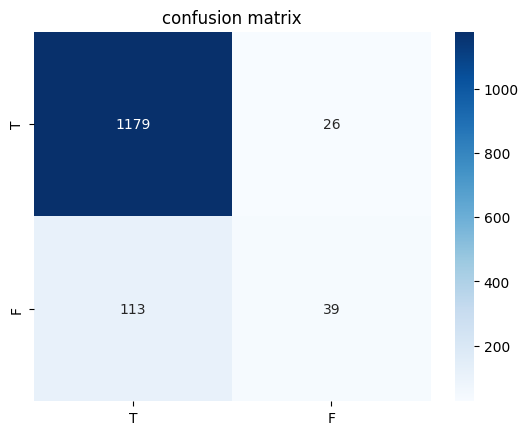

In [157]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])
plt.title('confusion matrix')

### GridSearchCV

In [158]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='f1' , refit = True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

In [159]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8960943257184967


In [160]:
from sklearn.ensemble import RandomForestClassifier
cv_rfc=RandomForestClassifier(bootstrap =  False, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
cv_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5)

In [161]:
y_pred = cv_rfc.predict(X_test)

In [162]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.8953574060427414
F1-Score: 0.3603603603603604
Precision score: 0.5714285714285714


Text(0.5, 1.0, 'confusion matrix')

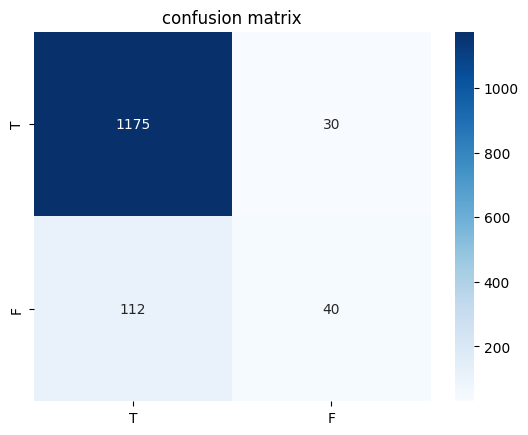

In [163]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])
plt.title('confusion matrix')

## k-Nearest Neighbors


In [164]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [165]:
y_pred = knn.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.8769344141488578
F1-Score: 0.32931726907630526
Precision score: 0.422680412371134


In [167]:
# Tạo DataFrame từ y_pred và y_test
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# In ra một số dòng đầu của DataFrame
results_df.head(10)

,Actual,Predicted
2398,0.0,0.0
800,0.0,0.0
2288,0.0,0.0
2344,0.0,0.0
3615,0.0,0.0
3548,0.0,0.0
1115,0.0,0.0
4053,0.0,0.0
838,0.0,0.0
4141,0.0,0.0


Text(0.5, 1.0, 'confusion matrix')

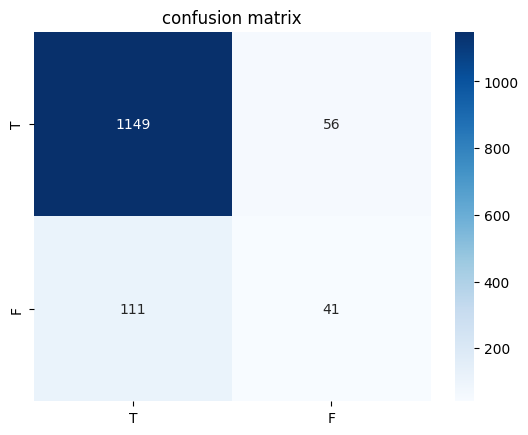

In [168]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])
plt.title('confusion matrix')

### GridSearchCV

In [169]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='precision' , refit = True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

In [170]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Accuracy: 0.887988209285188


In [171]:
cv_knn=KNeighborsClassifier(algorithm = 'auto', n_neighbors= 9, p= 1, weights= 'distance')
cv_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [172]:
y_pred = cv_knn.predict(X_test)

In [173]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, confusion_matrix

# Tính accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

# Tính f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Tính precision_score
p = precision_score(y_test, y_pred)
print(f'Precision score: {p}')

accuracy_score: 0.887988209285188
F1-Score: 0.2830188679245283
Precision score: 0.5


Text(0.5, 1.0, 'confusion matrix')

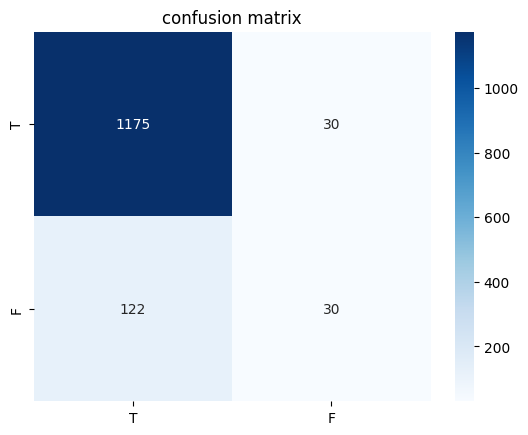

In [174]:
conf_matrix  = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt="d", cmap="Blues", xticklabels=['T' , 'F'], yticklabels=['T' , 'F'])
plt.title('confusion matrix')